In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import regex as re
import string
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')


from gensim.models import Word2Vec

# from tensorflow import keras
# from tensorflow.keras import layers

import warnings 
warnings.filterwarnings(action = 'ignore')


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gravi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
print(np.__version__)

1.19.2


In [3]:
reddit = pd.read_csv('sample_comments.csv', index_col=0)

reddit.head()

,label,comment
139484,0,Nope.
638093,0,Donde esta la biblioteca?
662570,0,I feel bad for the mummy... not even the minio...
652534,1,"The Pirate Bay, of course!"
411846,1,That's exactly how multiple photographers ende...


In [4]:
# custom tokenizer function

def tokenizer(series):
    
    corpus = series.values
    tokens = []
    
    for document in corpus:
        #removing punctuation
        for punc in string.punctuation:
            document = document.replace(punc, '')
        # removing numbers and splitting sentences    
        document = re.sub("\d+", "", document).lower()
        tokens.append(document.split(' '))
        
    
        

    return tokens

In [5]:
X = reddit['comment']
y = reddit['label']

In [6]:
X.values

array(['Nope.', 'Donde esta la biblioteca?',
       'I feel bad for the mummy... not even the minions want to get close to him :(',
       ...,
       'You have to remember that only their black lives matter.......................',
       "Learning few words of the local language when you do to a country wouldn't kill you.",
       'We could have the pre and post parties at the new fake 400 bar!'],
      dtype=object)

In [7]:
tokenizer(X[:2])

[['nope'], ['donde', 'esta', 'la', 'biblioteca']]

In [8]:
tokenized_data = tokenizer(X)

In [9]:
model = Word2Vec(tokenized_data, window=5, min_count=1, workers=4)
model.train(tokenized_data, total_examples=model.corpus_count, epochs=model.epochs)

(10359968, 13178775)

In [10]:
model.most_similar('sarcastic')

[('detained', 0.7662061452865601),
 ('facetious', 0.7601372599601746),
 ('bitbybit', 0.7511639595031738),
 ('glamorouslion', 0.6905873417854309),
 ('naysayer', 0.6895689368247986),
 ('pedantic', 0.6880913972854614),
 ('achievementist', 0.6860612630844116),
 ('joking', 0.6816750168800354),
 ('soundless', 0.6792351603507996),
 ('aggressor', 0.6676892042160034)]

In [11]:
model.most_similar('sarcasm')

[('tag', 0.6604176163673401),
 ('nsfw', 0.6461413502693176),
 ('text', 0.6391680836677551),
 ('username', 0.6115491390228271),
 ('comment', 0.6064691543579102),
 ('reply', 0.6039153337478638),
 ('statement', 0.5947394371032715),
 ('satire', 0.5878256559371948),
 ('troll', 0.5775316953659058),
 ('post', 0.5766584277153015)]

In [12]:
model.most_similar('satire')

[('nerdcubed', 0.767389714717865),
 ('newive', 0.7608744502067566),
 ('factually', 0.7481676936149597),
 ('flawed', 0.739734947681427),
 ('xxblazeitxx', 0.739246129989624),
 ('itobama', 0.737808883190155),
 ('statewide', 0.7309578657150269),
 ('incorrect', 0.7230198979377747),
 ('moleskine', 0.7212676405906677),
 ('bs', 0.715360164642334)]

In [13]:
model.most_similar(positive=['joke', 'sarcastic'])

[('joking', 0.6691443920135498),
 ('detained', 0.6384910941123962),
 ('satire', 0.611587405204773),
 ('troll', 0.6105169057846069),
 ('teenager', 0.607511579990387),
 ('sumire', 0.604194700717926),
 ('bitbybit', 0.6012907028198242),
 ('rude', 0.5990847945213318),
 ('facetious', 0.5968437194824219),
 ('creepy', 0.5931844115257263)]

In [14]:
model.most_similar(positive=['pedantic', 'sarcastic'], negative=['joke'], topn=5)

[('facetious', 0.7373484373092651),
 ('naysayer', 0.7119937539100647),
 ('supersafety', 0.7072086334228516),
 ('glamorouslion', 0.7049016356468201),
 ('deansafbi', 0.7023043632507324)]

In [15]:
model.most_similar(positive=['politics', 'sarcasm'])

[('statements', 0.6646245121955872),
 ('islam', 0.6564873456954956),
 ('gamergate', 0.6521426439285278),
 ('bigotry', 0.6421420574188232),
 ('science', 0.6300203800201416),
 ('arguments', 0.6262994408607483),
 ('ignorance', 0.6151260137557983),
 ('censorship', 0.6123901605606079),
 ('softwarethat', 0.605620265007019),
 ('racism', 0.6051369309425354)]

In [16]:
model.most_similar(['onion', 'facetious'])

[('feigning', 0.8424457311630249),
 ('neonazi', 0.8404813408851624),
 ('fr', 0.8400999307632446),
 ('gayi', 0.8381698131561279),
 ('automatico', 0.8378533720970154),
 ('larticolo', 0.8377243280410767),
 ('rakhi', 0.8372451066970825),
 ('inflable', 0.8354091048240662),
 ('sugli', 0.833313524723053),
 ('goeda', 0.8323245644569397)]

In [17]:
sarcastic = model.most_similar(positive=['sarcastic'])
genuine = model.most_similar(positive=['genuine'])

pd.DataFrame(
        data={
            "sarcastic": [word for word, sim in sarcastic], 
            "genuine": [word for word, sim in genuine]
        }
)

,sarcastic,genuine
0,detained,osbourne
1,facetious,digong
2,bitbybit,hote
3,glamorouslion,tankie
4,naysayer,fangays
5,pedantic,kreative
6,achievementist,unkreative
7,joking,ossigeno
8,soundless,cest
9,aggressor,warga


In [18]:
misleading = model.most_similar(positive=['misleading'])
honest = model.most_similar(positive=['honest'])

pd.DataFrame(
        data={
            "misleading": [word for word, sim in misleading], 
            "honest": [word for word, sim in honest]
        }
)

,misleading,honest
0,clickbait,fair
1,editorialized,consigned
2,hypersensationalised,polite
3,credible,therell
4,informative,fumu
5,damien,pentester
6,blatent,americandont
7,lolzorz,overlayed
8,clickbaity,pretending
9,attimo,powerprejudice


In [19]:
words = ['duh', 'scrub', 'obvious', 'shitlord', 'forgot', 'imo', 'although', 'honestly', 'mostly', 'unfortunate']

In [20]:
sarcasm_test = []

for word in words:
    sarcasm_test.append(model[word])

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

top_words = pca.fit_transform(sarcasm_test)

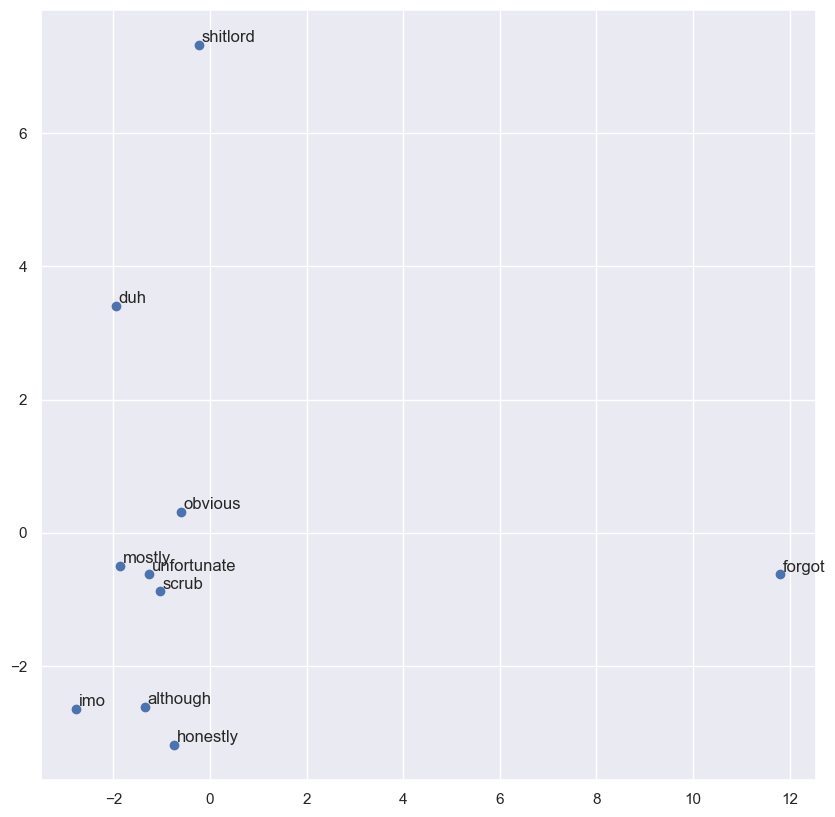

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(top_words[:,0], top_words[:,1])
            
for i, word in enumerate(words):
    plt.annotate(word, xy=(top_words[i,0], top_words[i,1]), xytext=(2,2), textcoords='offset points')

plt.show()

In [23]:
def sentence(document):
    size = model.vector_size
    word_vec_document = np.zeros(size)
    count = 1
    
    for word in document:
        if word in model:
            count +=1
            word_vec_document += model[word]
    
    word_vec_document = word_vec_document / count
    
    return word_vec_document

In [24]:
test_document = 'I love my wife. She is so beautiful.'
new_test = 'call me again tomorrow, so good to see you'

In [25]:
sentence(test_document)

array([ 0.22120112, -0.48305121,  0.22625108,  0.02745026, -0.18351771,
       -1.18801609,  0.42255966, -0.71823085,  0.31315489,  0.0574427 ,
       -0.19385174,  1.3264394 , -0.2427449 , -1.6583403 ,  0.32257901,
        0.1618716 ,  0.33805842, -0.64777529, -0.4341928 ,  0.54473969,
        1.05157208, -0.03341158,  0.50644455,  0.20096236, -0.12597513,
       -0.33931998, -0.49720174,  0.83549618,  0.63662466,  0.37153627,
        0.39510067,  0.72394594, -0.73043582, -1.24069087, -0.48823716,
        0.53517823,  0.32776803, -0.10275213, -1.20446124, -0.04864013,
        0.20084891,  0.66536046, -0.11685568,  0.66101145, -0.27227823,
       -0.69492828, -1.30939099,  0.52298546, -0.50381072, -0.04743279,
       -0.19366672, -0.01280028,  1.06475788,  0.27023109, -0.79643331,
       -0.08806657, -0.36015555,  0.71660767,  1.69167786, -0.67644503,
        1.36694789, -0.50618343, -0.38710932, -0.491072  , -0.38275876,
        0.18052815,  0.33827924,  0.06358576,  0.59143363, -0.73

In [26]:
variable = sentence(new_test)
print(len(variable))

100


In [27]:
document_vectors = [sentence(doc) for doc in tokenized_data]

In [28]:
document_vectors[0].shape

(100,)

In [29]:
X = document_vectors

In [30]:
from sklearn.model_selection import train_test_split
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:

X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.25, random_state=42)

In [32]:
len(X_train)

142131

In [33]:
model = Word2Vec(tokenized_data, window=5, min_count=1, workers=4, size=300, max_vocab_size=10000 )
model.train(tokenized_data, total_examples=model.corpus_count, epochs=model.epochs)

(8700845, 13178775)

In [46]:
mislead = model.most_similar(positive=['lie'])
honest = model.most_similar(positive=['honest'])

pd.DataFrame(
        data={
            "lie": [word for word, sim in mislead], 
            "honest": [word for word, sim in honest]
        }
)

,lie,honest
0,talk,fair
1,complain,prepared
2,trust,rude
3,forget,careful
4,listen,considered
5,offend,sarcastic
6,criticize,friendly
7,worry,ignorant
8,say,proud
9,care,accurate


In [36]:
from sklearn.neural_network import MLPClassifier

In [37]:
neural_network = MLPClassifier(verbose=True, max_iter=50, random_state=42)

In [38]:
neural_network.fit(X_train, y_train)

Iteration 1, loss = 0.62897090
Iteration 2, loss = 0.60577355
Iteration 3, loss = 0.59776671
Iteration 4, loss = 0.59231015
Iteration 5, loss = 0.58794447
Iteration 6, loss = 0.58453328
Iteration 7, loss = 0.58203933
Iteration 8, loss = 0.57912760
Iteration 9, loss = 0.57692757
Iteration 10, loss = 0.57468123
Iteration 11, loss = 0.57323417
Iteration 12, loss = 0.57160992
Iteration 13, loss = 0.56988815
Iteration 14, loss = 0.56836644
Iteration 15, loss = 0.56713288
Iteration 16, loss = 0.56597577
Iteration 17, loss = 0.56522233
Iteration 18, loss = 0.56444367
Iteration 19, loss = 0.56311033
Iteration 20, loss = 0.56215115
Iteration 21, loss = 0.56126869
Iteration 22, loss = 0.56030011
Iteration 23, loss = 0.55949954
Iteration 24, loss = 0.55869154
Iteration 25, loss = 0.55807721
Iteration 26, loss = 0.55756103
Iteration 27, loss = 0.55632837
Iteration 28, loss = 0.55579611
Iteration 29, loss = 0.55531223
Iteration 30, loss = 0.55523019
Iteration 31, loss = 0.55393371
Iteration 32, los

MLPClassifier(max_iter=50, verbose=True)

In [39]:
print(f'Train: {neural_network.score(X_train, y_train)}')
print(f'Val: {neural_network.score(X_val, y_val)}')


Train: 0.7211375421266296
Val: 0.6721896238760606
